In [1]:
import datetime
import os
from mdagent import MDAgent

In [2]:
#todays date and time
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date and time: 2024-08-06
time: 21:14:44


In [3]:
prompt1 = "Simulate pdb  1MBN at two different temperatures: 300K, 400K for 1ns seconds each. Plot RMSD of both over time, and compare the final secondary structures at the end of the simulations."
llm_var = "gpt-4o-2024-05-13"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)

In [4]:
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

LLM:  gpt-4o-2024-05-13 
Temperature:  0.1


In [5]:
result = agent.run(prompt1)



> Entering new AgentExecutor chain...
Thought: To address the question, I need to perform the following steps:
1. Download the PDB file for 1MBN.
2. Set up and run two separate simulations at 300K and 400K for 1ns each.
3. Compute the RMSD for both simulations over time.
4. Compute the secondary structure at the end of both simulations.
5. Plot the RMSD over time for both simulations and compare the final secondary structures.

First, I will download the PDB file for 1MBN.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "1MBN"
  }
}
```Thought: To address the question, I need to perform the following steps:
1. Download the PDB file for 1MBN.
2. Set up and run two separate simulations at 300K and 400K for 1ns each.
3. Compute the RMSD for both simulations over time.
4. Compute the secondary structure at the end of both simulations.
5. Plot the RMSD over time for both simulations and compare the final secondary structures.

First, I will download the PD

2024-08-06 21:14:49.917 
  command:

    streamlit run /opt/anaconda3/envs/llama-mdagent/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]



Observation: Succeeded. Downloaded the PDB file:1MBN_211450
Thought:To proceed, I need to set up and run two separate simulations for the PDB file 1MBN at temperatures 300K and 400K for 1ns each. I will start with the simulation at 300K.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1MBN_211450",
    "forcefield_files": ["amber99sb.xml", "tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1.0 * nanometers",
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble": "NPT",
      "Number of Steps": 500000,
      "record_interval_steps": 5000,
      "record_para

In [6]:
#print final date and time
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date and time: 2024-08-07
time: 03:21:21


In [7]:
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1MBN_211450: PDB file downloaded from RSCB
 PDBFile ID: 1MBN_211450
 1MBN_211506: Cleaned File:  Removed Heterogens
 and Water Kept.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_211511: Initial positions for simulation sim0_211511
 sim0_211511: Basic Simulation of Protein 1MBN_211506
 rec0_211515: Simulation trajectory for protein 1MBN_211506 and simulation sim0_211511
 rec1_211515: Simulation state log for protein 1MBN_211506 and simulation sim0_211511
 rec2_211515: Simulation pdb frames for protein 1MBN_211506 and simulation sim0_211511
 top_sim0_005733: Initial positions for simulation sim0_005733
 sim0_005733: Basic Simulation of Protein 1MBN_211506
 rec0_005736: Simulation trajectory for protein 1MBN_211506 and simulation sim0_005733
 rec1_005736: Simulation state log for protein 1MBN_211506 and simulation sim0_005733
 rec2_005736: Simulation pdb frames for protein 1MBN_211506 

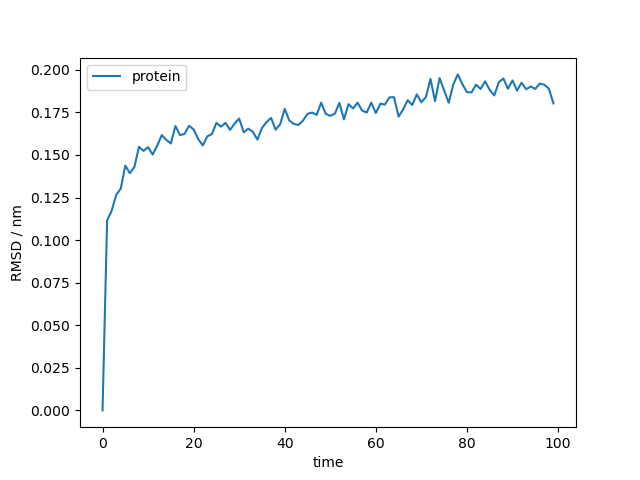

In [9]:
#plotting rmsd of both simulations
from IPython.display import Image
rmsd1ID = 'fig0_032042'
rmsd2ID = 'fig0_032045'
path1 = registry.get_mapped_path(rmsd1ID)
path2 = registry.get_mapped_path(rmsd2ID)


Image(filename=path1)



In [11]:
import mdtraj as md
import numpy as np

traj_path = registry.get_mapped_path("rec2_211515")
top_path = registry.get_mapped_path("top_sim0_211511")
traj = md.load(traj_path, top=top_path)

# Compute the secondary structure of the trajectory
dssp_final = md.compute_dssp(traj[-1], simplified=True)
dssp_initial = md.compute_dssp(traj[0], simplified=True)

print('At 300 K: ')
print("Number of initial sheets: ",len([i for i in dssp_initial[0] if i == 'E']))
print("Number of initial helices: ",len([i for i in dssp_initial[0] if i == 'H']))
print("Number of initial coils: ",len([i for i in dssp_initial[0] if i == 'C']))
print()
print("Number of final sheets: ",len([i for i in dssp_final[0] if i == 'E']))
print("Number of final helices: ",len([i for i in dssp_final[0] if i == 'H']))
print("Number of final coils: ",len([i for i in dssp_final[0] if i == 'C']))

At 300 K: 
Number of initial sheets:  0
Number of initial helices:  112
Number of initial coils:  41

Number of final sheets:  0
Number of final helices:  111
Number of final coils:  42


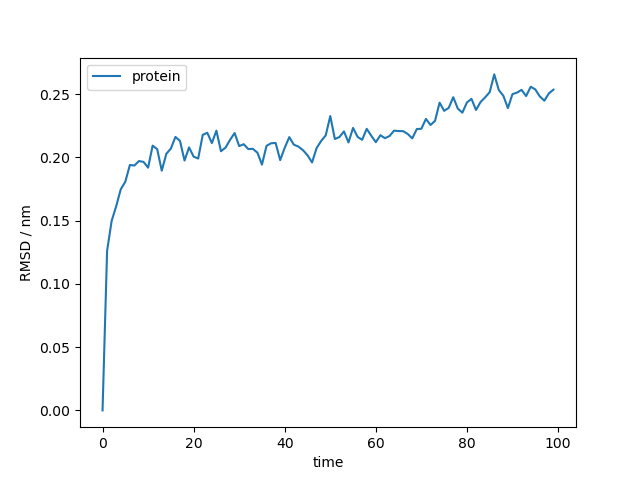

In [12]:
Image(filename=path2)

In [13]:
import mdtraj as md
import numpy as np

traj_path = registry.get_mapped_path("rec2_005736")
top_path = registry.get_mapped_path("top_sim0_005733")
traj = md.load(traj_path, top=top_path)

# Compute the secondary structure of the trajectory
dssp_final = md.compute_dssp(traj[-1], simplified=True)
dssp_initial = md.compute_dssp(traj[0], simplified=True)

print('At 400K: ')
print("Number of initial sheets: ",len([i for i in dssp_initial[0] if i == 'E']))
print("Number of initial helices: ",len([i for i in dssp_initial[0] if i == 'H']))
print("Number of initial coils: ",len([i for i in dssp_initial[0] if i == 'C']))
print()
print("Number of final sheets: ",len([i for i in dssp_final[0] if i == 'E']))
print("Number of final helices: ",len([i for i in dssp_final[0] if i == 'H']))
print("Number of final coils: ",len([i for i in dssp_final[0] if i == 'C']))

At 400K: 
Number of initial sheets:  0
Number of initial helices:  106
Number of initial coils:  47

Number of final sheets:  0
Number of final helices:  108
Number of final coils:  45


# Experiment Result:
### Completed without Exception or TimeOut Errors  ✅
### Attempted all necessary steps ✅
### Completed without Hallucination ✅
### Logic make sense  ❌
### Correct Answer   ✅


Note that DSSP tool sums up counts over all frames instead of last frame, which isn't intended. 